# TECH CHALLENGE - FIAP
Trabalho do primeiro módulo da Pós Graduação de Inteligência Artificial da FIAP.
<hr>

### Desafio: Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

#### Projeto baseado no dataset Medical Cost Personal Datasets encontrado no Kaggle e disponibilizado por Miri Choi.
Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

### Dados do dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Age</b> - Idade do beneficiário principal</li>
    <li><b>Sex</b> - Gênero do contratante de seguros, feminino, masculino</li>
    <li><b>BMI</b> - IMC, Índice de massa corporal, índice objetivo de peso corporal (kg/m^2) usando a relação entre altura e peso</li>
    <li><b>Children</b> - Número de filhos cobertos por seguro saúde / Número de dependentes</li>
    <li><b>Smoker</b> - Fumante, sendo sim ou não os valores</li>
    <li><b>Region</b> - A área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.</li>
    <li><b>Charges</b> - Encargos, custos médicos individuais cobrados pelo seguro de saúde</li>
</ul>

### Importando as bibliotecas utilizadas

In [71]:
import pandas as pd
import numpy as np
np.random.seed(42)
import os
import seaborn as sns

# Configurando parâmetros dos gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 1. Exploração de dados

- Carregar a base de dados e explorar suas características
- Analisar estatísticas descritivas e visualizar distribuições relevantes

In [72]:
# lendo a base de dados
dataset = pd.read_csv("insurance.csv")

In [73]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
# tamanho do dataset - linhas e colunas
dataset.shape

(1338, 7)

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Observa-se que todas as 1338 linhas estão preenchidas para todas as colunas, não tendo valores nulos no dataset.
- Temos algumas variáveis não categóricas, como sex, smoker e region

In [76]:
# análise estatística
dataset.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

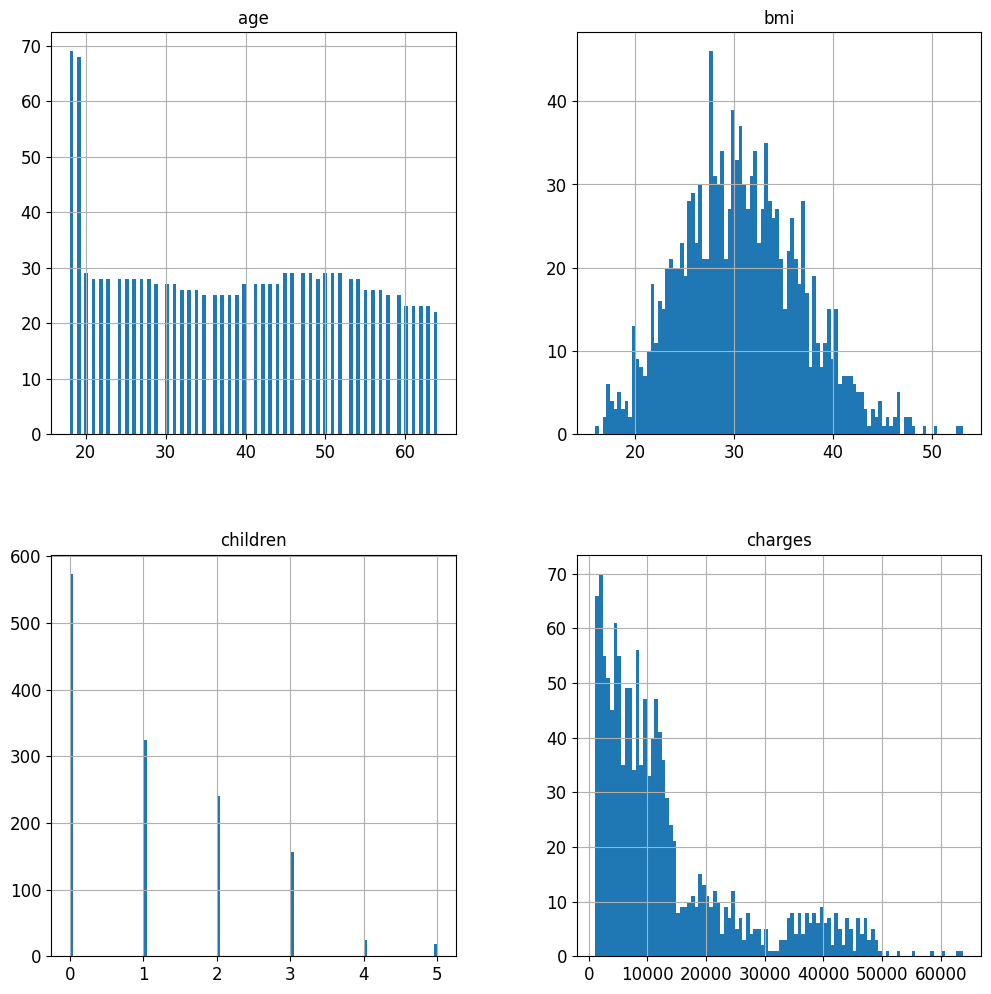

In [77]:
# Plotando histogramas para analisar a simetria dos dados

%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=100, figsize=(12, 12))

Observações:

- No gráfico de idade (age) percebe-se que é a distribuição é quase igual de 20 a 60 anos, tendo uma concentraçaõ em 18 e 19 anos.
- No histograma de imc (bci) observa-se que está simétrico, tendo uma média em 30.
- A variável de crianças (children) tem uma concentração maior em 0, e os registros vão diminuindo quando a quantidade de crianças aumenta.
- A variável charges (despesas) é nossa target, nela é possível observar uma assimetria a esquerda, com concentração grande de registros antes do 10.000 dólares, e seus dados vão até 64.000 dólares, mas com poucos registros depois dos 50.000.
- É possível observar bastante assimetria nos dados.

#### Separando o dataset em variáveis categóricas e numéricas

In [78]:
categorical_columns = dataset.select_dtypes(include=object).columns.tolist()
numerical_columns = dataset.select_dtypes(exclude=object).columns.tolist()

In [79]:
correlation_matrix = dataset[numerical_columns].corr().round(4)
correlation_matrix

,age,bmi,children,charges
age,1.0000,0.1093,0.0425,0.2990
bmi,0.1093,1.0000,0.0128,0.1983
children,0.0425,0.0128,1.0000,0.0680
charges,0.2990,0.1983,0.0680,1.0000


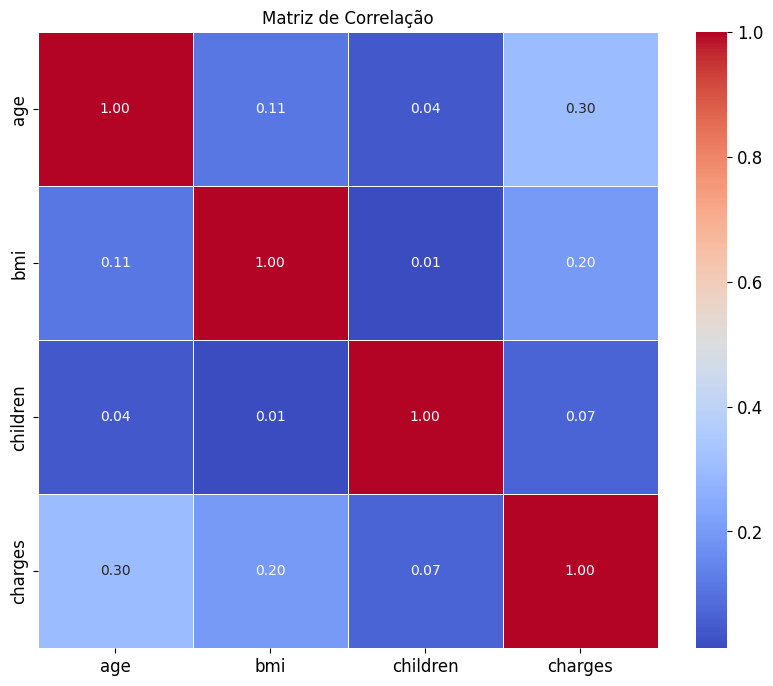

In [80]:
import seaborn as sns

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Sabemos que a correlação é muito importante para entendermos as relações das variáveis. 

Observando só as variáveis numéricas, observa-se que nenhuma das variáveis numéricas tem muita correlação. 

Idade é uma das que tem um pouco mais, porém ainda menor do que 0.5.


### Investigando nossa target - Variável Charges

<Axes: title={'center': 'Custos'}, xlabel='Dólares'>

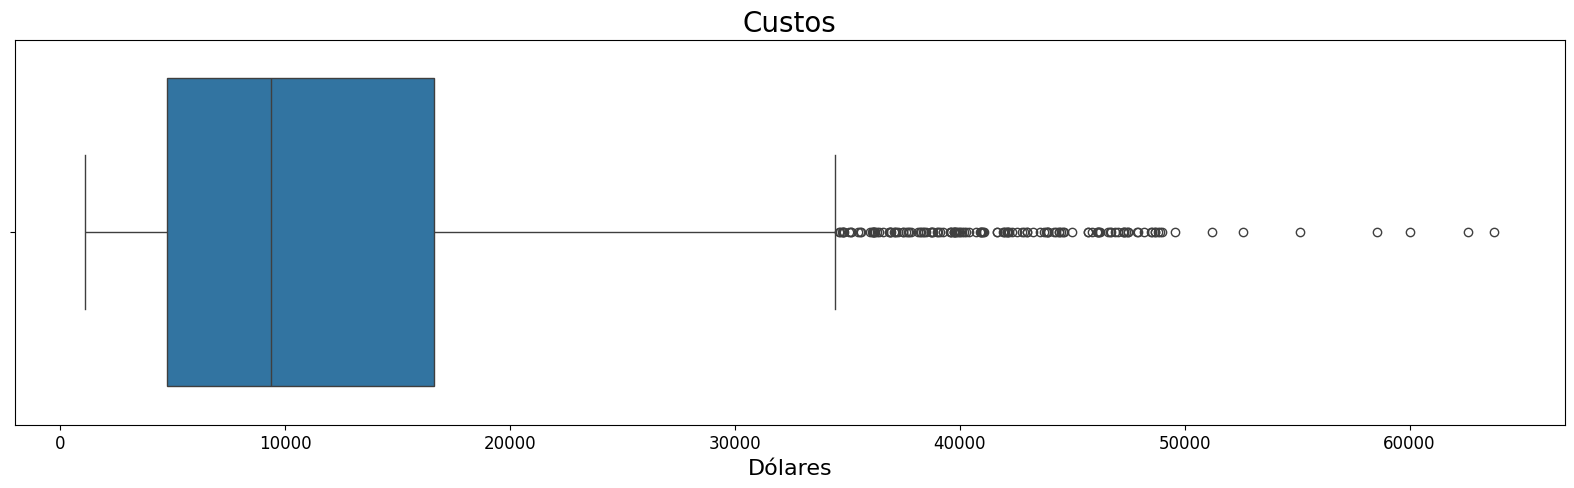

In [81]:
ax = sns.boxplot(data=dataset['charges'], orient='h')
ax.figure.set_size_inches(20, 5)
ax.set_title('Custos', fontsize=20)
ax.set_xlabel('Dólares', fontsize=16)
ax

Como já era esperado pela grande assimetria de dados da target, observamos muito outliers nos dados com custo acima de 35.000 doláres.

## 2. Pré-processamento de dados

- Realizar limpeza dos dados, tratando valores ausentes (se necessário).
- Converter variáveis categóricas em formatos adequados para modelagem.

Existem 3 variávies que não são numéricas, vamos analisar essas 3 variáveis categóricas: SEX, SMOKER e REGION.

In [82]:
print("Sex: ", set(dataset["sex"]))
print("Smoker: ", set(dataset["smoker"]))
print("Region: ", set(dataset["region"]))

Sex:  {'male', 'female'}
Smoker:  {'yes', 'no'}
Region:  {'southwest', 'southeast', 'northeast', 'northwest'}


In [83]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [84]:
dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [85]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Faremos a conversão das variáveis categóricas: sex, smoker e region para observarmos se elas tem alguma correlação com as outras variáveis e com a nossa target - charges.

In [86]:
categorical_columns

['sex', 'smoker', 'region']

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [88]:
dataset.describe().round(2)

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00,1338.00
mean,39.21,0.51,30.66,1.09,0.2,1.52,13270.42
std,14.05,0.50,6.10,1.21,0.4,1.10,12110.01
min,18.00,0.00,15.96,0.00,0.0,0.00,1121.87
25%,27.00,0.00,26.30,0.00,0.0,1.00,4740.29
50%,39.00,1.00,30.40,1.00,0.0,2.00,9382.03
75%,51.00,1.00,34.69,2.00,0.0,2.00,16639.91
max,64.00,1.00,53.13,5.00,1.0,3.00,63770.43


Agora que as variáveis categóricas foram transformadas em numéricas, vamos avaliar o dataset novamente.

In [89]:
correlacao = dataset.corr()

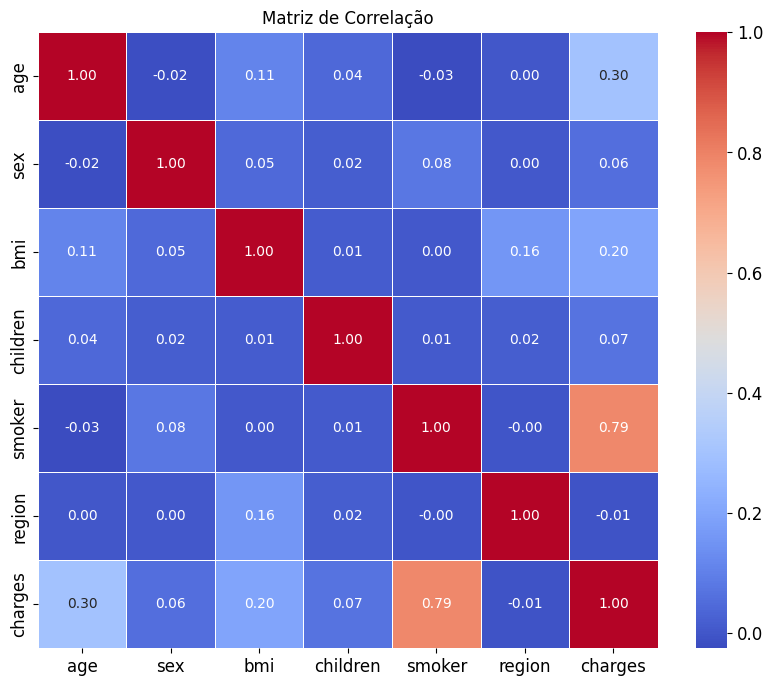

In [90]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

- Observa-se que a variável smoker tem uma correlação com a nossa target.

## 3. Modelagem

- Criar um modelo preditivo de regressão (Regressão Linear, Árvores de Decisão, etc)
- Dividir o conjunto de dados em conjuntos de treinamento e teste.

### 1 - Primeira Modelagem

In [91]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
x = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Variáveis características
y = dataset['charges'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
treino = len(X_train)
teste = len(X_test)
print(f"Treinamento: {treino} linhas")
print(f"Teste: {teste} linhas")

Treinamento: 1070 linhas
Teste: 268 linhas


### 2 - Segunda Modelagem, depois de aplicar logaritmo

#### Testando a aplicação de logaritmo nos dados

Para corrigir a assimetria dos dados quantitativos e obter uma distribuição mais próxima da normalidade, aplicaremos o logaritmo e vamos observar se isso melhora a performance do modelo.

In [93]:
np.log(1)

0.0

In [94]:
dataset['log_age'] = np.log(dataset['age'])
dataset['log_sex'] = np.log(dataset['sex'] +1 )
dataset['log_bmi'] = np.log(dataset['bmi'])
dataset['log_children'] = np.log(dataset['children'] + 1)
dataset['log_smoker'] = np.log(dataset['smoker'] + 1)
dataset['log_region'] = np.log(dataset['region'] + 1)
dataset['log_charges'] = np.log(dataset['charges'])

In [95]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,log_age,log_sex,log_bmi,log_children,log_smoker,log_region,log_charges
0,19,0,27.900,0,1,3,16884.92400,2.944439,0.000000,3.328627,0.000000,0.693147,1.386294,9.734176
1,18,1,33.770,1,0,2,1725.55230,2.890372,0.693147,3.519573,0.693147,0.000000,1.098612,7.453302
2,28,1,33.000,3,0,2,4449.46200,3.332205,0.693147,3.496508,1.386294,0.000000,1.098612,8.400538
3,33,1,22.705,0,0,1,21984.47061,3.496508,0.693147,3.122585,0.000000,0.000000,0.693147,9.998092
4,32,1,28.880,0,0,1,3866.85520,3.465736,0.693147,3.363149,0.000000,0.000000,0.693147,8.260197


In [96]:
dataset_log = dataset[['log_age', 'log_sex', 'log_bmi', 'log_children', 'log_smoker', 'log_region', 'log_charges']]
dataset_log.head()

,log_age,log_sex,log_bmi,log_children,log_smoker,log_region,log_charges
0,2.944439,0.000000,3.328627,0.000000,0.693147,1.386294,9.734176
1,2.890372,0.693147,3.519573,0.693147,0.000000,1.098612,7.453302
2,3.332205,0.693147,3.496508,1.386294,0.000000,1.098612,8.400538
3,3.496508,0.693147,3.122585,0.000000,0.000000,0.693147,9.998092
4,3.465736,0.693147,3.363149,0.000000,0.000000,0.693147,8.260197


In [114]:
dataset_log.describe().round(2)

,log_age,log_sex,log_bmi,log_children,log_smoker,log_region,log_charges
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,3.60,0.35,3.40,0.58,0.14,0.80,9.10
std,0.39,0.35,0.20,0.56,0.28,0.52,0.92
min,2.89,0.00,2.77,0.00,0.00,0.00,7.02
25%,3.30,0.00,3.27,0.00,0.00,0.69,8.46
50%,3.66,0.69,3.41,0.69,0.00,1.10,9.15
75%,3.93,0.69,3.55,1.10,0.00,1.10,9.72
max,4.16,0.69,3.97,1.79,0.69,1.39,11.06


<Axes: >

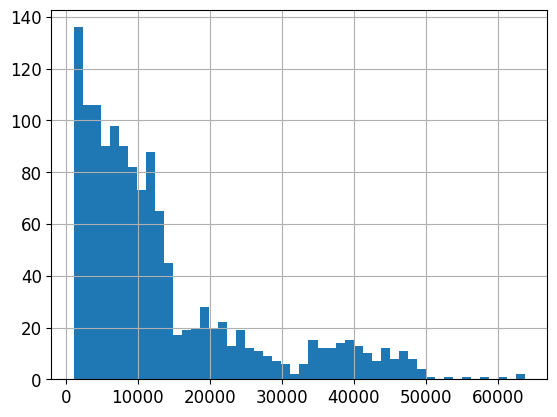

In [97]:
dataset['charges'].hist(bins=50)

<Axes: >

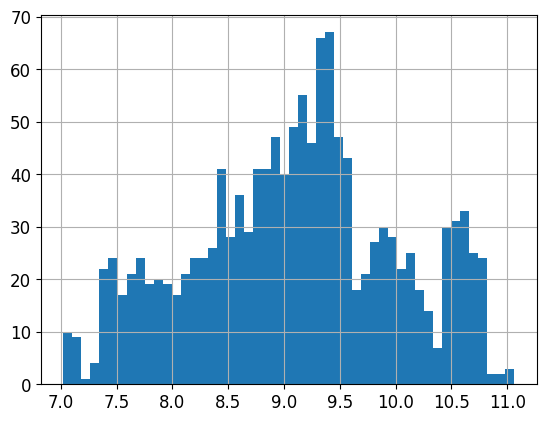

In [98]:
dataset_log['log_charges'].hist(bins=50)

In [99]:
# analisando a correlação novamente
correlacao_logs = dataset_log.corr()

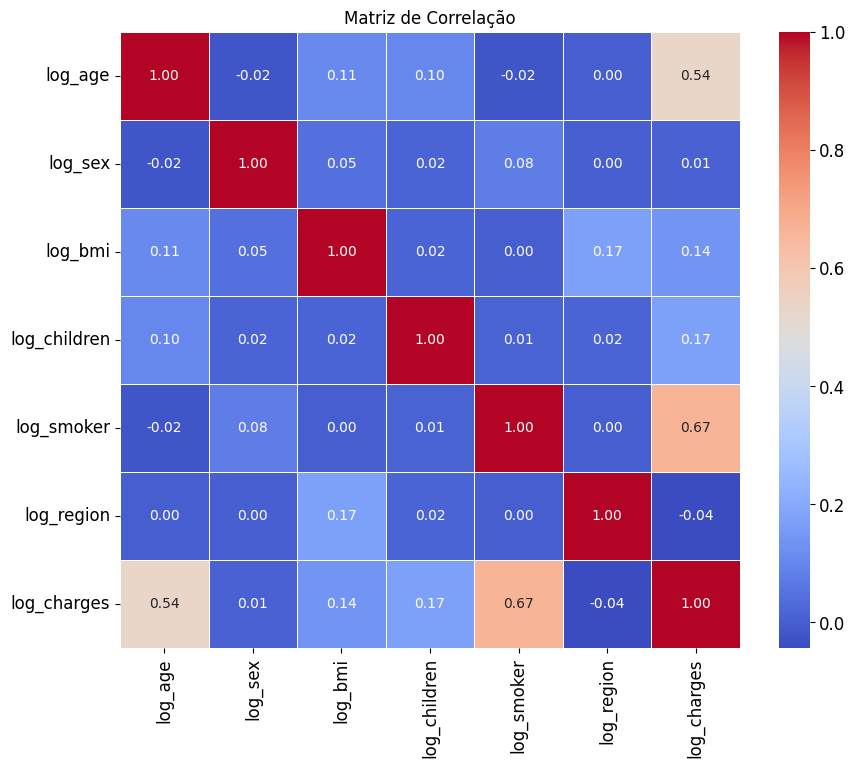

In [100]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_logs, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Após aplicação do logaritmo, observamos que:
- foi ajustado a assimetria da nossa varíavel target, o que pode ajudar na performance do modelo. 
- apareceu mais uma variável correlacionada com a target: log_age

Vamos validar mais abaixo qual das duas modelagens (sem e com tratamento) performa melhor.

#### Separando os dados tratados em treino e teste

In [101]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
#x = dataset.drop(['charges'], axis=1)  # Variáveis características
x_log = dataset_log.drop(['log_charges'], axis=1) 
y_log = dataset_log['log_charges'] # O que eu quero prever. (Target)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=42)

In [102]:
treino = len(X_train)
teste = len(X_test)
print(f"Treinamento: {treino} linhas")
print(f"Teste: {teste} linhas")

Treinamento: 1070 linhas
Teste: 268 linhas


## 4. Treinamento e avaliação do modelo

- Treinar o modelo com o conjunto de treinamento

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

### 4.1 Regressão Linear - com dados da primeira modelagem, antes de tratar os dados com logaritmo

In [104]:

# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression


modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

In [105]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [106]:
# Previsão
y_pred = lin_reg.predict(X_test)
y_pred[0]

8924.407244424494

#### Validação do modelo

In [107]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"MSE Score: {mse.round(2)}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")
print(f"MAE Score: {mae.round(2)}")

MSE Score: 33635210.43
R2 Score: 78.33% 
MAE Score: 4186.51


Observamos que o modelo está performando bem, com um R2 score de 78.33%.

Porém o MSE Score dele está muito alto, considerando que quanto menor o valor do MSE, melhor o ajuste do modelo aos dados, não é aceitável um MSE de 33635210.43.

E o MAE aponta um erro de margem de 4186.51 dólares, o que não é muito aceitável no nosso modelo sendo que os valores médios da nossa target variam entre 10 a 15 mil. Podemos definir aqui que esse modelo está com overfiting.
Vamos usar a nossa modelagem 2 com a aplicação do logaritmo para ver como performa.


### 4.2 Regressão Linear - com dados da segunda modelagem

In [108]:
lin_reg_log = LinearRegression()

In [109]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression


modelo_log = LinearRegression()
modelo_log.fit(X_train_log, y_train_log)

# Fazendo previsões no conjunto de teste
previsoes_log = modelo_log.predict(X_test_log)

In [110]:
lin_reg_log.fit(X_train_log, y_train_log)

LinearRegression()

In [111]:
# Previsão
y_pred_log = lin_reg_log.predict(X_test_log)
y_pred_log[0]

9.173624289589155

#### Validação do modelo

In [115]:
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)
mae_log = mean_absolute_error(y_test_log,y_pred_log)

print(f"MSE Score {mse_log.round(2)}")
print(f"R2 Score: {(r2_log * 100).round(2)}% ")
print(f"MAE Score: {mae_log.round(2)}")

MSE Score 0.18
R2 Score: 80.29% 
MAE Score: 0.29


Com base na R2 Score de 78.33%, foi possível observar uma melhora de 1,96%. Mesmo não sendo um valor considerável, analisando as outras validações vemos que o MSE abaixou de 33635210.43 para 0.18, o que é ótimo visto que o modelo ajusta melhor os dados com um MSE menor. Um outro problema anteriormente era que o MAE estava com um valor de 4186.51 dólares, sendo que a média da target era de 13270.42, após a aplicação do logaritmo nos dados a média passou a ser 9.10 com um MAE de 0.29, considerado um MAE ótimo.

## 5. Validação estatística

- Apresentar resultados visuais, como gráficos de previsões vs. valores reais.
- Análise de resultados, insights obtidos e validação estatística.

In [41]:
y_pred_train = lin_reg.predict(X_train)

In [42]:
y_pred_train_log = lin_reg_log.predict(X_train_log)

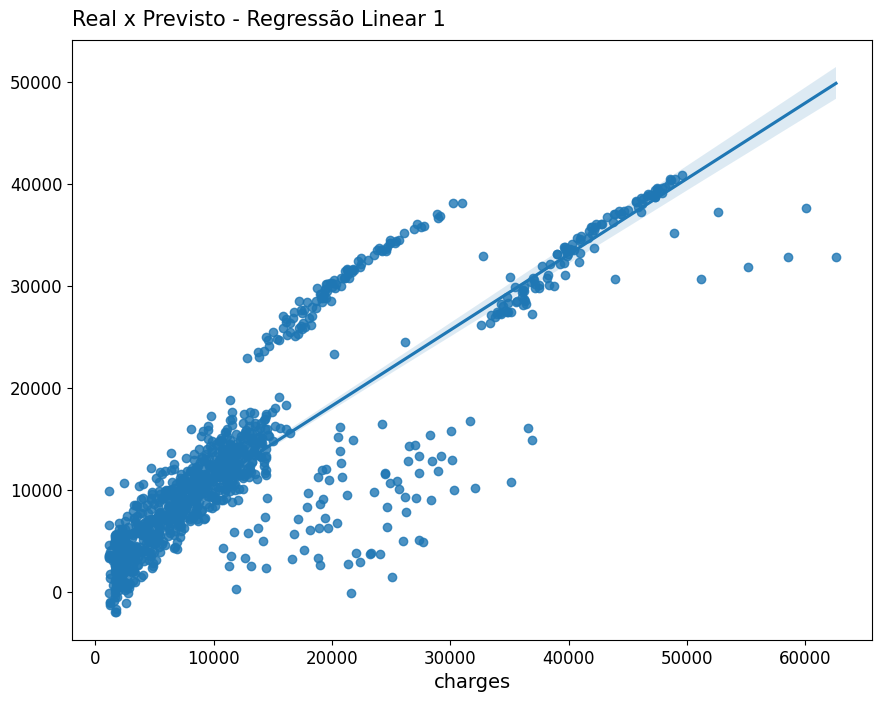

In [48]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.regplot(x = y_train, y = y_pred_train)
ax.set_title('Real x Previsto - Regressão Linear 1', loc = 'left', fontsize = 15, pad = 10)
plt.show()

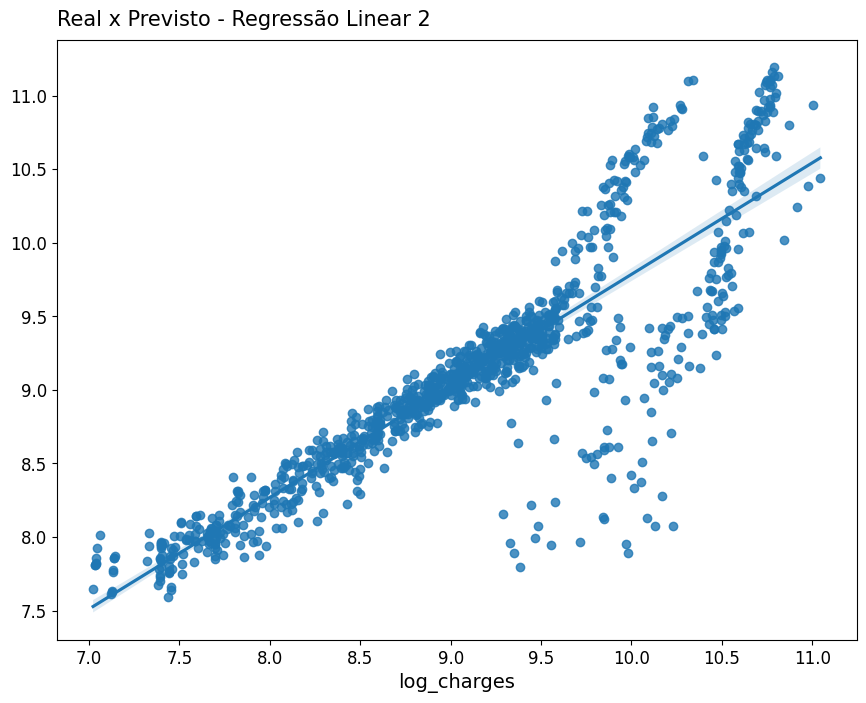

In [47]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.regplot(x = y_train_log, y = y_pred_train_log)
ax.set_title('Real x Previsto - Regressão Linear 2', loc = 'left', fontsize = 15, pad = 10)
plt.show()

Concluímos que a aplicação do algoritmo fez com que o modelo performasse muito melhor, como é possível ver na imagem do gráfico acima, onde a previsão está acompanhando a linha até perto do final. É justificável estar com mais dificuldade de prever os custos mais altos, pois era onde a nossa target apresentava mais outliers.
Após realizar as validações dos modelos, consideramos que o modelo está performando melhor com a segunda modelagem.